<a href="https://colab.research.google.com/github/abhi-pal123/abhishek-kumar/blob/main/task_2_movie_rating_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Downloading Dataset

Movie_data

In [ ]:
df_movie=pd.read_csv('/content/preprocessed_data.csv',sep="::",engine='python')
df_movie.dropna(inplace=True)
df_movie.head()

,"Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Overview"
0,"The Godfather,1972,175,9.2,100.0,2002655,""Crim..."
1,"The Godfather Part II,1974,202,9.0,90.0,135860..."
2,"Ordinary People,1980,124,7.7,86.0,56476,Drama,..."
3,"Lawrence of Arabia,1962,218,8.3,100.0,313044,""..."
4,"Straw Dogs,1971,113,7.4,73.0,64331,""Crime, Dra..."


In [ ]:
df_movie.shape

(2000, 1)

In [ ]:
df_movie.describe()

,"Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Overview"
count,2000
unique,2000
top,"The Godfather,1972,175,9.2,100.0,2002655,""Crim..."
freq,1


In [ ]:
df_movie.isna().sum()

index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director    0
dtype: int64

In [ ]:
df_ratings=pd.read_csv("/content/ratings.csv.zip", sep="::", engine="python")
df_ratings.dropna(inplace=True)
df_ratings.head(10)

,"userId,movieId,rating,timestamp"
0,"1,1,4.0,964982703"
1,"1,3,4.0,964981247"
2,"1,6,4.0,964982224"
3,"1,47,5.0,964983815"
4,"1,50,5.0,964982931"
5,"1,70,3.0,964982400"
6,"1,101,5.0,964980868"
7,"1,110,4.0,964982176"
8,"1,151,5.0,964984041"
9,"1,157,5.0,964984100"


In [ ]:
df_ratings.shape

(100004, 1)

In [ ]:
df_ratings.describe()

,"userId,movieId,rating,timestamp"
count,100836
unique,100836
top,"1,1,4.0,964982703"
freq,1


In [ ]:
df_ratings.isna().sum()

userId,movieId,rating,timestamp    0
dtype: int64

Users_data

In [ ]:
df_users=pd.read_csv("/content/users (1).dat", sep="::", engine="python")
df_users.dropna(inplace=True)
df_users.head(10)

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [ ]:
df_users.shape

(400, 1)

In [ ]:
df_users.describe()

,"User ID,Gender,Age,EstimatedSalary,Purchased"
count,400
unique,400
top,"15624510,Male,19,19000,0"
freq,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_users['count']= labelencoder.fit_transform(df_users['unique'])

df_users.head()


KeyError: 'unique'

In [ ]:
df_users.isna().sum()

1        0
F        0
1.1      0
10       0
48067    0
dtype: int64

CONCONETING THE DATASETS

In [ ]:
df_data=pd.concat([df_movie,df_ratings,df_users],axis=1)
df_data.dropna()
df_data.head(10)


,"Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Overview","userId,movieId,rating,timestamp",1,F,1.1,10,48067
0,"The Godfather,1972,175,9.2,100.0,2002655,""Crim...","1,1,4.0,964982703",2.0,M,6.0,16.0,70072
1,"The Godfather Part II,1974,202,9.0,90.0,135860...","1,3,4.0,964981247",3.0,M,2.0,15.0,55117
2,"Ordinary People,1980,124,7.7,86.0,56476,Drama,...","1,6,4.0,964982224",4.0,M,4.0,7.0,02460
3,"Lawrence of Arabia,1962,218,8.3,100.0,313044,""...","1,47,5.0,964983815",5.0,M,2.0,20.0,55455
4,"Straw Dogs,1971,113,7.4,73.0,64331,""Crime, Dra...","1,50,5.0,964982931",6.0,F,5.0,9.0,55117
5,"Close Encounters of the Third Kind,1977,138,7....","1,70,3.0,964982400",7.0,M,3.0,1.0,06810
6,"Once Upon a Time in the West,1968,166,8.5,82.0...","1,101,5.0,964980868",8.0,M,2.0,12.0,11413
7,"The Dirty Dozen,1967,150,7.7,73.0,78858,""Actio...","1,110,4.0,964982176",9.0,M,2.0,17.0,61614
8,"Rosemary's Baby,1968,137,8.0,96.0,234034,""Dram...","1,151,5.0,964984041",10.0,F,3.0,1.0,95370
9,"Cabaret,1972,124,7.8,80.0,59119,""Drama, Music,...","1,157,5.0,964984100",11.0,F,2.0,1.0,04093


In [ ]:
df_data.shape

(100836, 7)

In [ ]:
df2=df_data.drop(["F"],axis=1)
df2.head()

,"Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Overview","userId,movieId,rating,timestamp",1,1.1,10,48067
0,"The Godfather,1972,175,9.2,100.0,2002655,""Crim...","1,1,4.0,964982703",2.0,6.0,16.0,70072
1,"The Godfather Part II,1974,202,9.0,90.0,135860...","1,3,4.0,964981247",3.0,2.0,15.0,55117
2,"Ordinary People,1980,124,7.7,86.0,56476,Drama,...","1,6,4.0,964982224",4.0,4.0,7.0,02460
3,"Lawrence of Arabia,1962,218,8.3,100.0,313044,""...","1,47,5.0,964983815",5.0,2.0,20.0,55455
4,"Straw Dogs,1971,113,7.4,73.0,64331,""Crime, Dra...","1,50,5.0,964982931",6.0,5.0,9.0,55117


In [ ]:
df2.describe()


,1,1.1,10
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,2.621957,8.146547
std,1743.453469,1.500134,6.329991
min,2.000000,0.000000,0.000000
25%,1511.500000,2.000000,3.000000
50%,3021.000000,2.000000,7.000000
75%,4530.500000,3.000000,14.000000
max,6040.000000,6.000000,20.000000


In [ ]:
df2.isna().sum()

Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Overview    98836
userId,movieId,rating,timestamp                                                                        0
1                                                                                                  94797
1.1                                                                                                94797
10                                                                                                 94797
48067                                                                                              94797
dtype: int64

In [ ]:
df_final=df2.dropna()

In [ ]:
df_final.shape

(2000, 6)

<Axes: xlabel='1', ylabel='count'>

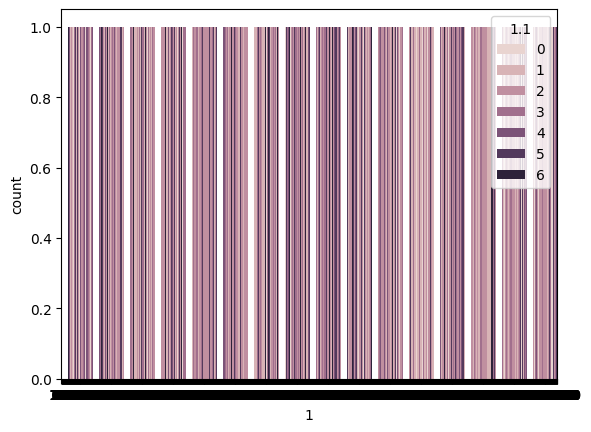

In [ ]:
sns.countplot(x=df_final['1'],hue=df_final['1.1'])

Text(0.5, 0, '1.1')

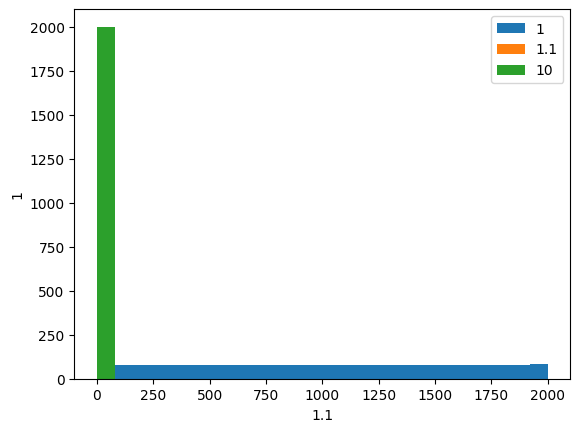

In [ ]:
df_final.plot.hist(bins=25)
plt.ylabel("1")
plt.xlabel("1.1")


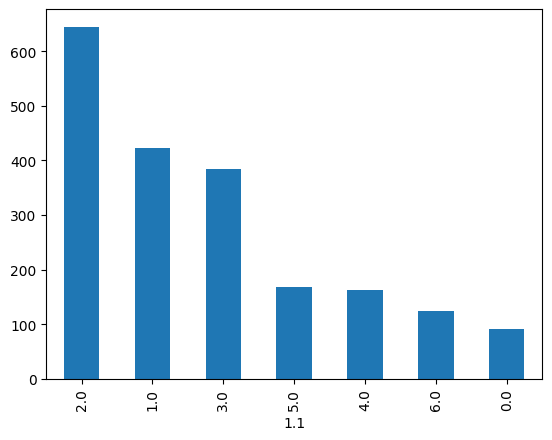

In [ ]:
df_final['1.1'].value_counts().plot(kind='bar')
plt.show()

Text(0, 0.5, '1.1')

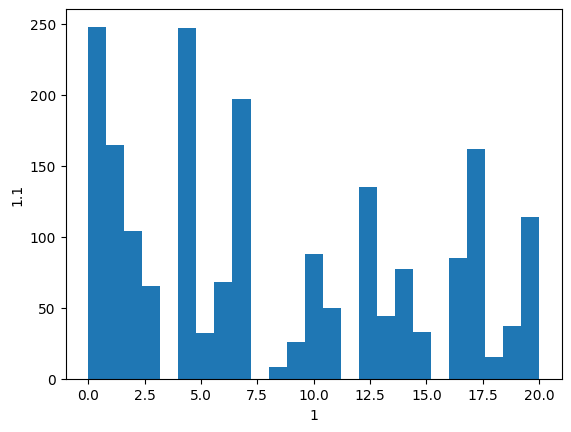

In [ ]:
df_final['10'].plot.hist(bins=25)
plt.xlabel("1")
plt.ylabel("1.1")

<Axes: ylabel='Frequency'>

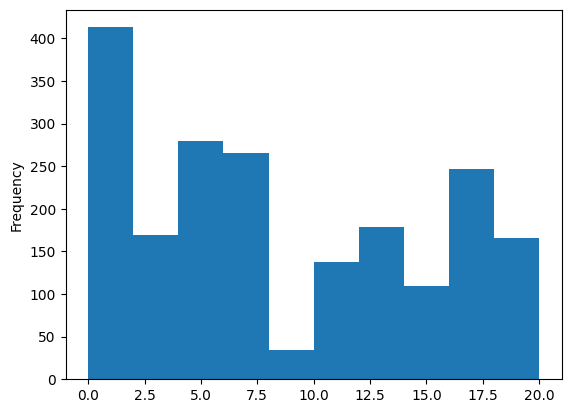

In [ ]:
df_final['10'].plot.hist(bins=10)
# plt.xlabel("Ratings")
# plt.ylabel("Age")

<Axes: xlabel='10', ylabel='count'>

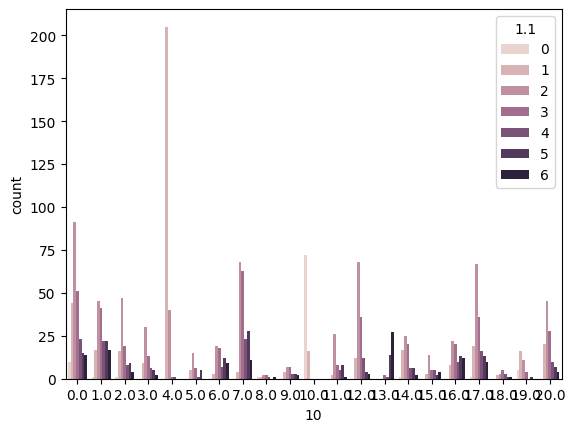

In [ ]:
sns.countplot(x=df_final['10'],hue=df_final['1.1'])

In [ ]:
df_final.head()

,"Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Overview","userId,movieId,rating,timestamp",1,1.1,10,48067
0,"The Godfather,1972,175,9.2,100.0,2002655,""Crim...","1,1,4.0,964982703",2.0,6.0,16.0,70072
1,"The Godfather Part II,1974,202,9.0,90.0,135860...","1,3,4.0,964981247",3.0,2.0,15.0,55117
2,"Ordinary People,1980,124,7.7,86.0,56476,Drama,...","1,6,4.0,964982224",4.0,4.0,7.0,02460
3,"Lawrence of Arabia,1962,218,8.3,100.0,313044,""...","1,47,5.0,964983815",5.0,2.0,20.0,55455
4,"Straw Dogs,1971,113,7.4,73.0,64331,""Crime, Dra...","1,50,5.0,964982931",6.0,5.0,9.0,55117


In [ ]:
input=df_final.drop(['1.1','48067','1','10'], axis=1)
target=df_final['1.1']

In [ ]:
target.head()

0    6.0
1    2.0
2    4.0
3    2.0
4    5.0
Name: 1.1, dtype: float64

In [ ]:
input.head()

,"Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Overview","userId,movieId,rating,timestamp"
0,"The Godfather,1972,175,9.2,100.0,2002655,""Crim...","1,1,4.0,964982703"
1,"The Godfather Part II,1974,202,9.0,90.0,135860...","1,3,4.0,964981247"
2,"Ordinary People,1980,124,7.7,86.0,56476,Drama,...","1,6,4.0,964982224"
3,"Lawrence of Arabia,1962,218,8.3,100.0,313044,""...","1,47,5.0,964983815"
4,"Straw Dogs,1971,113,7.4,73.0,64331,""Crime, Dra...","1,50,5.0,964982931"


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,
                         columns=input.columns)
scaled_df.head()

ValueError: could not convert string to float: 'The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97,"The Godfather (1972) is a Crime, Drama film directed by Francis Ford Coppola starring Marlon Brando. Rated 9.2 on IMDB."'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(input,target,test_size=0.3)

In [ ]:
print(Y_train)

1742    3.0
1879    3.0
462     1.0
1084    1.0
1634    2.0
       ... 
1327    1.0
1581    3.0
1870    5.0
1177    5.0
1351    0.0
Name: 1.1, Length: 1400, dtype: float64


In [ ]:
print(Y_test)

499     2.0
520     2.0
744     1.0
162     6.0
1648    2.0
       ... 
121     3.0
1147    2.0
1737    6.0
1071    2.0
694     2.0
Name: 1.1, Length: 600, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

ValueError: could not convert string to float: 'Doomsday,I 2008,113,5.9,51.0,79779,"Action, Sci-Fi, Thriller",Neil Marshall,Rhona Mitra,10.96,"Doomsday (I 2008) is a Action, Sci-Fi, Thriller film directed by Neil Marshall starring Rhona Mitra. Rated 5.9 on IMDB."'

In [ ]:
X_test = np.array(X_test)


In [ ]:
model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'The Land Before Time,1988,69,7.4,66.0,98163,"Animation, Adventure, Drama",Don Bluth,Pat Hingle,48.09,"The Land Before Time (1988) is a Animation, Adventure, Drama film directed by Don Bluth starring Pat Hingle. Rated 7.4 on IMDB."'